In [55]:
# Imports
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")  # Apply Seaborn's theme

Basic stuff. Examples. S&P 500

,price
year,
2006-12-01,8560
2007-01-01,8656
2007-02-01,9017
2007-03-01,9296
2007-04-01,9366
...,...
2024-03-01,17561
2024-04-01,17442
2024-05-01,17825


,price
count,212.000000
mean,10227.863208
std,2372.581000
min,8125.000000
25%,8564.500000
50%,9167.500000
75%,11370.750000
max,17942.000000


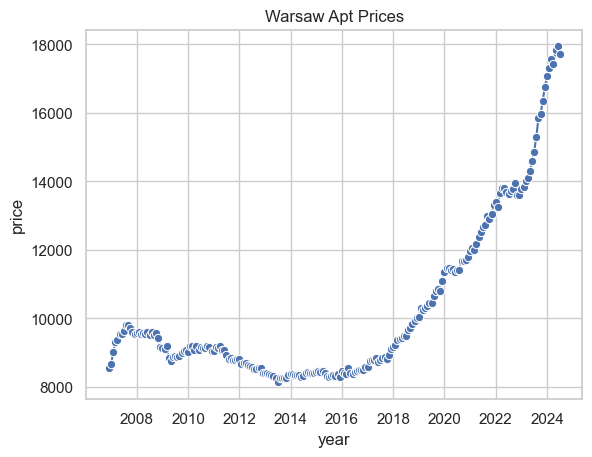

In [58]:
# Warsaw Apartment data
warsaw_apt_data = pd.read_csv("datasources/warsaw_real_estate.csv", names=["price"], index_col=0)

warsaw_apt_data.index = warsaw_apt_data.index.map(lambda x: x.split("(")[0].strip())
warsaw_apt_data.index = pd.to_datetime(warsaw_apt_data.index, format="%a %b %d %Y %H:%M:%S GMT%z", utc=True).date
warsaw_apt_data.index.name = "year"

warsaw_apt_data.price = warsaw_apt_data.price.map(lambda x: x.replace(" ", ""))
warsaw_apt_data.price = pd.to_numeric(warsaw_apt_data.price, errors='coerce')

# Print
display(warsaw_apt_data)
display(warsaw_apt_data.describe())

# Plot
ax = sns.lineplot(x=warsaw_apt_data.index, y=warsaw_apt_data.price, marker='o')
ax.set_title('Warsaw Apt Prices')
plt.show()

,yoy,compounded
year,,
2007,102.5,1.000000
2008,104.2,1.042000
2009,103.5,1.078470
2010,102.6,1.106510
2011,104.3,1.154090
2012,103.7,1.196791
2013,100.9,1.207563
2014,100.0,1.207563
2015,99.1,1.196695


,yoy,compounded
count,18.000000,18.000000
mean,103.555556,1.271355
std,3.828718,0.223519
min,99.100000,1.000000
25%,101.700000,1.162946
50%,103.000000,1.207563
75%,104.075000,1.293227
max,114.400000,1.809395


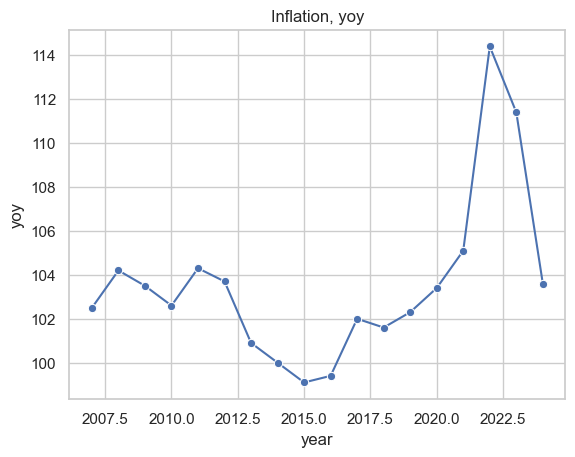

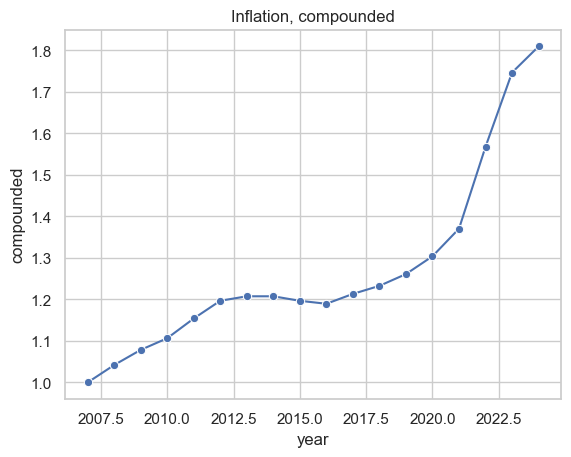

In [59]:
# Inflation
inflation = pd.DataFrame(
    columns=["year", "yoy"],
    data=[
        (2007, 102.5),
        (2008, 104.2),
        (2009, 103.5),
        (2010, 102.6),
        (2011, 104.3),
        (2012, 103.7),
        (2013, 100.9),
        (2014, 100.0),
        (2015, 99.1),
        (2016, 99.4),
        (2017, 102.0),
        (2018, 101.6),
        (2019, 102.3),
        (2020, 103.4),
        (2021, 105.1),
        (2022, 114.4),
        (2023, 111.4),
        (2024, 103.6),
    ]
)
inflation.set_index("year", inplace=True)

inflation.loc[2007, "compounded"] = 1
for i in range(2008, 2007 + len(inflation)):
    inflation.loc[i, "compounded"] = inflation.loc[i-1, "compounded"] * (inflation.loc[i, "yoy"] / 100)

# Print
display(inflation)
# Print basic stats
display(inflation.describe())
# Plot
ax = sns.lineplot(x=inflation.index, y=inflation.yoy, marker="o")
ax.set_title('Inflation, yoy')
plt.show()

ax = sns.lineplot(x=inflation.index, y=inflation.compounded, marker="o")
ax.set_title('Inflation, compounded')
plt.show()



,price,adjusted
year,,
2007,9456.750000,9456.750000
2008,9517.750000,9134.117083
2009,8969.833333,8317.183912
2010,9133.583333,8254.404856
2011,8966.583333,7769.395883
2012,8602.000000,7187.551076
2013,8300.250000,6873.556593
2014,8367.916667,6929.592334
2015,8367.916667,6992.525060


count      18.000000
mean     8131.517999
std       929.638059
min      6873.556593
25%      7206.588752
50%      8285.794384
75%      8800.679859
max      9700.241963
Name: adjusted, dtype: float64

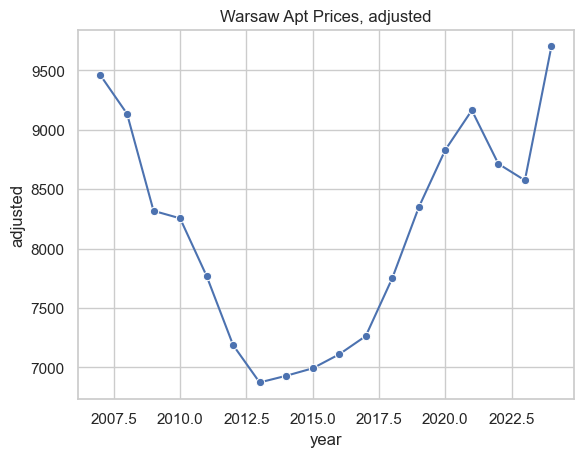

In [60]:
# Real value (warsaw apt price + inflation)

warsaw_apt_data_adjusted = warsaw_apt_data.copy()
warsaw_apt_data_adjusted.index = pd.to_datetime(warsaw_apt_data_adjusted.index)
warsaw_apt_data_adjusted_year = warsaw_apt_data_adjusted.groupby(warsaw_apt_data_adjusted.index.year).mean()

adjusted_prices = warsaw_apt_data_adjusted_year.price / inflation.compounded
warsaw_apt_data_adjusted_year = warsaw_apt_data_adjusted_year.merge(adjusted_prices.rename("adjusted"), left_index=True, right_index=True)
warsaw_apt_data_adjusted_year = warsaw_apt_data_adjusted_year.iloc[1:] # drop year 2006

display(warsaw_apt_data_adjusted_year)
display(warsaw_apt_data_adjusted_year.adjusted.describe())

ax = sns.lineplot(x=warsaw_apt_data_adjusted_year.index, y=warsaw_apt_data_adjusted_year.adjusted, marker='o')
ax.set_title('Warsaw Apt Prices, adjusted')
plt.show()



![](https://bankowo24.pl/wp-content/uploads/2019/10/wzor_obliczanie_raty.jpg)

I = pmt - wysokość raty równej.  
N = pv - kwota udzielonego kredytu.   
r = i - oprocentowanie kredytu w skali roku.   
k = m - liczba rat płatnych w ciągu roku (np. k=4 dla rat płatnych co kwartał).   
n – liczba rat.  